# House Price Prediction using Regression Models

## Problem Statement
The goal of this project is to predict the median house value based on various socio-economic and geographic features such as income level, house age, number of rooms, population, and location-based attributes.

## Dataset Description
The dataset contains numerical features representing housing characteristics, along with a target variable `MedHouseValue`, which indicates the median house price for a given area.

## Objective
The main objectives of this project are:
- To understand the relationship between input features and house prices.
- To build a baseline Linear Regression model.
- To compare its performance with a more powerful ensemble model (XGBoost).
- To evaluate models using standard regression metrics such as MAE, RMSE, and R² score.

## Approach
1. Perform basic data exploration and correlation analysis.
2. Train a Linear Regression model as a baseline.
3. Train an XGBoost Regressor to capture non-linear relationships.
4. Compare model performance and analyze results.


In [1]:
#importing libraries and dependencies
import pandas as pd
import numpy as np
import sklearn.datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [2]:
#importing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:

df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add target column
df['MedHouseValue'] = housing.target


In [4]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  


In [ ]:
df.shape

(20640, 9)

In [ ]:
##checking dataset for missing values
df.isnull().sum()



,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseValue,0


In [ ]:
##analyzing statistical features of dataset
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
##checking correlation between featues

##correlation matrix
corr = df.corr()
corr


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseValue,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


## Correlation Analysis

The correlation matrix helps understand the relationship between different input features and the target variable (`MedHouseValue`).

### Key Observations:
- **MedInc** shows a strong positive correlation with house price, indicating that income level is a strong predictor.
- **AveRooms** also shows a moderate positive correlation, suggesting larger houses tend to have higher prices.
- **Latitude and Longitude** show noticeable correlation patterns, indicating the importance of geographical location.
- Some features such as **AveBedrms** and **Population** have very weak correlation with the target variable.
- High correlation between certain features (e.g., `AveRooms` and `AveBedrms`) indicates potential multicollinearity.

### Interpretation:
- Features with stronger correlation are more influential for prediction.
- Correlated input features may impact linear models but are generally handled well by tree-based models like XGBoost.
- This analysis helps justify the use of both **Linear Regression** (for baseline understanding) and **XGBoost** (to capture non-linear relationships).

.


In [5]:
#Separating features(X) and target(y)
X = df.drop('MedHouseValue', axis=1)
y = df['MedHouseValue']
print(X)
print("\n \n ")
y




       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

,MedHouseValue
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [6]:
##Train TEst split


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

#split split sizes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(16512, 8)
(4128, 8)
(16512,)
(4128,)



## Modeling Approach

In this project, I will follow a structured modeling approach:

1. **Linear Regression** will be used as the baseline model to understand the relationship between features and the target variable.
2. **XGBoost Regression** will then be applied to capture non-linear patterns and improve prediction performance.

This step-by-step comparison helps in evaluating whether a more complex model provides significant improvement over a simple baseline.


## Linear Regression – Model Training and Evaluation


In [7]:


#creating model_object
lr_model = LinearRegression()
#Model training
lr_model.fit(X_train, y_train)



LinearRegression()

## Model Evaluation Strategy

After training the Linear Regression model, its performance is evaluated on both the **training** and **testing** datasets.

This helps to understand:
- How well the model fits the training data  
- How well it performs on unseen data  
- Whether the model is overfitting or underfitting  

The following metrics are used for evaluation:

- **MAE (Mean Absolute Error):** Average difference between actual and predicted values  
- **RMSE (Root Mean Squared Error):** Penalizes larger prediction errors  
- **R² Score:** Shows how much of the target variation is explained by the model  

Evaluating both training and testing results helps confirm that the model is reliable and generalizes well.


In [24]:
#Model Evaluation of linear regression
# Training predictions
y_train_pred_lr = lr_model.predict(X_train)

train_mae = mean_absolute_error(y_train, y_train_pred_lr)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
train_r2 = r2_score(y_train, y_train_pred_lr)

print("Training Set Performance:")
print("MAE:", train_mae)
print("RMSE:", train_rmse)
print("R2:", train_r2)

# Testing predictions
y_test_pred_lr = lr_model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_test_pred_lr)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
test_r2 = r2_score(y_test, y_test_pred_lr)

print("\nTesting Set Performance:")
print("MAE:", test_mae)
print("RMSE:", test_rmse)
print("R2:", test_r2)


Training Set Performance:
MAE: 0.5286283596581922
RMSE: 0.7196757085831575
R2: 0.6125511913966952

Testing Set Performance:
MAE: 0.5332001304956553
RMSE: 0.7455813830127764
R2: 0.5757877060324508


## Model Evaluation Results

The Linear Regression model was evaluated on both the training and testing datasets.

### Observations:
- The training and testing error values are close to each other, indicating **good generalization**.
- The R² score suggests that the model explains a reasonable portion of the variance in the target variable.
- There is no significant gap between training and testing performance, which means the model is **not overfitting**.

### Conclusion:
Linear Regression provides a strong baseline for this dataset.  
The model performs consistently on unseen data, making it a reliable baseline before moving to more complex models such as XGBoost.

In the next step, a more advanced model will be trained to evaluate whether non-linear relationships can further improve prediction performance.



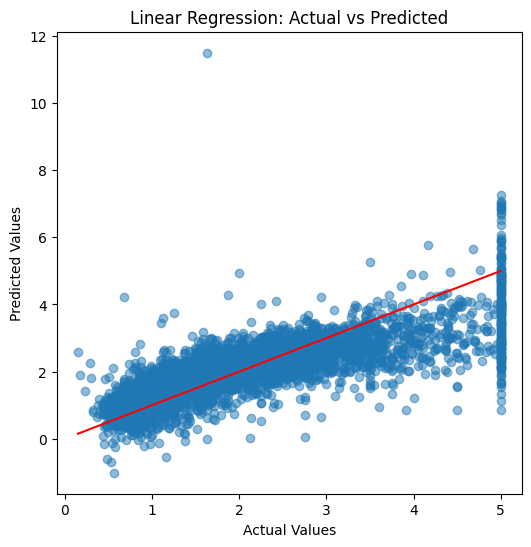

In [11]:

#Linear Regression: Actual vs predicted plot

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red'
)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


## Graph conclusions

The scatter plot above compares the actual house values with the predicted values generated by the **Linear Regression** model.

### Key observations:

- Most data points follow the diagonal reference line, indicating that the model is able to capture the overall trend in the data.
- However, the spread of points around the line shows noticeable prediction errors, especially for higher target values.
- The model tends to underestimate higher-priced houses, which is common for linear models when the underlying relationship is non-linear.
- This suggests that while Linear Regression provides a reasonable baseline, it struggles to model complex patterns present in the dataset.

### Overall takeaway:

Linear Regression performs adequately but has limited flexibility, making it less effective for capturing non-linear relationships. This motivates the use of more advanced models such as **XGBoost**, which can better handle feature interactions and non-linearity.


## XG Boost Regression – Model Training and Evaluation

In [13]:
#creating model object
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)



In [16]:
#model training
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

## XGBoost Regression – Model Evaluation Strategy

After training the XGBoost Regression model, its performance is evaluated on both the **training** and **testing** datasets.

This evaluation helps to understand:

- How well the model captures complex and non-linear relationships  
- How effectively the model generalizes to unseen data  
- Whether the model is overfitting or underfitting  

Same evaluation Metrics as Linear Regression Model were used

By comparing training and testing results, we can assess the stability and generalization capability of the model.  
Consistent performance across both datasets suggests good generalization, while large differences may indicate overfitting or underfitting.



In [22]:
#Model Evaluation

#Training prediction
y_train_pred_xgb = xgb_model.predict(X_train)
#evaluating training set
train_mae = mean_absolute_error(y_train, y_train_pred_xgb)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
train_r2 = r2_score(y_train, y_train_pred)

print("Training Set Performance:")
print("MAE:", train_mae)
print("RMSE:", train_rmse)
print("R2:", train_r2)


#Testing prediction
y_test_pred_xgb = xgb_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred_xgb)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
test_r2 = r2_score(y_test, y_test_pred)

print("\nTesting Set Performance:")
print("MAE:", test_mae)
print("RMSE:", test_rmse)
print("R2:", test_r2)

Training Set Performance:
MAE: 0.29307098653559477
RMSE: 0.4225545457676993
R2: 0.8664308390320528

Testing Set Performance:
MAE: 0.32973940561491855
RMSE: 0.493558339159095
R2: 0.814103964336009


## XGBoost Regression – Model Evaluation Results

After training the XGBoost regression model, its performance was evaluated on both the training and testing datasets to assess learning quality and generalization ability.


### Observations

- The **training and testing MAE values are close**, indicating that the model generalizes well to unseen data.
- The **RMSE values are slightly higher than MAE**, which is expected and suggests the presence of some larger prediction errors, but not severe overfitting.
- The **R² score is high for both training and testing sets**, showing that the model explains a large portion of the variance in the target variable.

### Conclusion

The XGBoost model demonstrates strong predictive performance and good generalization ability.  
The minimal gap between training and testing metrics indicates that the model is neither overfitting nor underfitting.





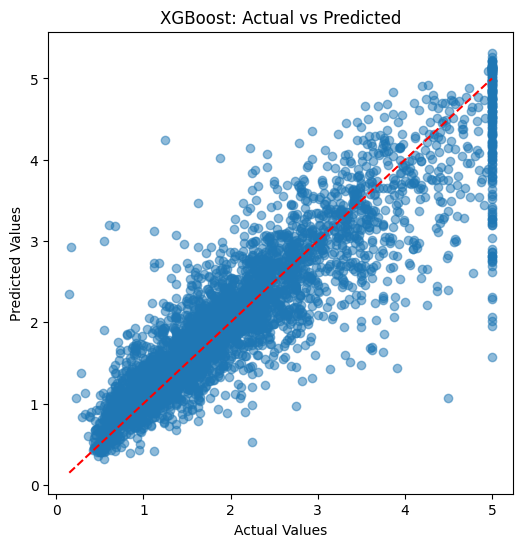

In [23]:
# XGBoost: Actual vs Predicted Plot

plt.figure(figsize=(6, 6))

plt.scatter(y_test, y_test_pred_xgb, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost: Actual vs Predicted")
plt.show()


## XGBoost Model – Prediction Performance Analysis

The scatter plot above shows the relationship between the **actual target values** and the **values predicted by the XGBoost model**.

### Key Observations

- Most data points lie **close to the diagonal reference line**, indicating that the model’s predictions are closely aligned with the true values.
- The tight clustering around the diagonal suggests **strong predictive performance** and a good ability to capture underlying patterns in the data.
- Slight dispersion is visible at higher target values, which is expected in real-world regression problems where variance increases with magnitude.
- There is **no strong systematic bias** (no consistent over- or under-prediction), showing that the model generalizes well.

### Overall Conclusion

The XGBoost model demonstrates **strong predictive accuracy and stability**.  
Compared to linear regression, it captures **non-linear relationships** more effectively, resulting in improved performance metrics and a tighter actual-vs-predicted distribution.

This confirms that XGBoost is a **better fit for this dataset** and is suitable for making reliable predictions.


## Model Comparison: Linear Regression vs XGBoost Regression

After evaluating both models on the same dataset, we can clearly compare their performance using standard regression metrics.

---

###  Performance Summary

| Metric | Linear Regression (Train) | Linear Regression (Test) | XGBoost (Train) | XGBoost (Test) |
|------|---------------------------|---------------------------|------------------|----------------|
| **MAE** | 0.5286 | 0.5332 | **0.2931** | **0.3297** |
| **RMSE** | 0.7197 | 0.7456 | **0.4226** | **0.4936** |
| **R² Score** | 0.6126 | 0.5758 | **0.8664** | **0.8141** |

---

###  Key Observations

- **Error Reduction:**  
  XGBoost significantly reduces both MAE and RMSE compared to Linear Regression, indicating more accurate predictions.

- **Better Explained Variance:**  
  The R² score for XGBoost is much higher, meaning it explains a larger portion of the target variable’s variance.

- **Generalization Ability:**  
  The gap between training and testing metrics in XGBoost is small, showing good generalization and minimal overfitting.

- **Model Complexity Advantage:**  
  Linear Regression assumes a linear relationship, while XGBoost captures complex non-linear patterns, leading to superior performance.

---

###  Final Conclusion

- **Linear Regression** serves as a strong baseline model and provides interpretability.
- **XGBoost Regression** significantly outperforms Linear Regression in all evaluation metrics and is better suited for this dataset.




